In [11]:
%config Completer.use_jedi = False

In [12]:
import numpy as np
import pandas as pd
import os

In [13]:
os.getcwd()

'/kaggle/working'

In [14]:
EARTH_AVG_RADIUS = 6371

In [15]:
import multiprocessing

cores_available = multiprocessing.cpu_count()

In [16]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/foursquare-location-matching/sample_submission.csv
/kaggle/input/foursquare-location-matching/pairs.csv
/kaggle/input/foursquare-location-matching/train.csv
/kaggle/input/foursquare-location-matching/test.csv


Split data with knn on lat and long


In [17]:
# pd.read_csv('kaggle/input/foursquare-location-matching/pairs.csv')

In [18]:
# pd.read_csv('kaggle/input/foursquare-location-matching/test.csv')

#  Submission Example:

In [19]:
pd.read_csv('/kaggle/input/foursquare-location-matching/sample_submission.csv')

,id,matches
0,E_00001118ad0191,E_00001118ad0191
1,E_000020eb6fed40,E_000020eb6fed40
2,E_00002f98667edf,E_00002f98667edf
3,E_001b6bad66eb98,E_001b6bad66eb98 E_0283d9f61e569d
4,E_0283d9f61e569d,E_0283d9f61e569d E_001b6bad66eb98


# Read training set:

In [20]:
df = pd.read_csv('/kaggle/input/foursquare-location-matching/train.csv')

In [21]:
df.head(5)

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest
0,E_000001272c6c5d,Café Stad Oudenaarde,50.859975,3.634196,Abdijstraat,Nederename,Oost-Vlaanderen,9700,BE,NaN,NaN,Bars,P_677e840bb6fc7e
1,E_000002eae2a589,Carioca Manero,-22.907225,-43.178244,NaN,NaN,NaN,NaN,BR,NaN,NaN,Brazilian Restaurants,P_d82910d8382a83
2,E_000007f24ebc95,ร้านตัดผมการาเกด,13.780813,100.484900,NaN,NaN,NaN,NaN,TH,NaN,NaN,Salons / Barbershops,P_b1066599e78477
3,E_000008a8ba4f48,Turkcell,37.844510,27.844202,Adnan Menderes Bulvarı,NaN,NaN,NaN,TR,NaN,NaN,Mobile Phone Shops,P_b2ed86905a4cd3
4,E_00001d92066153,Restaurante Casa Cofiño,43.338196,-4.326821,NaN,Caviedes,Cantabria,NaN,ES,NaN,NaN,Spanish Restaurants,P_809a884d4407fb


In [22]:
df.groupby('country').agg({'id':'count'}).sort_values(by='id',ascending=False).rename(columns={'id':'countries_count'}).describe()

,countries_count
count,221.000000
mean,5152.945701
std,21442.432855
min,1.000000
25%,13.000000
50%,113.000000
75%,1429.000000
max,245284.000000


In [23]:
df.groupby('point_of_interest').agg({'id':'count'}).sort_values(by='id',ascending=False).rename(columns={'id':'POI_count'})

,POI_count
point_of_interest,
P_fb339198a31db3,332
P_3a3fbd26e16269,199
P_f70a0977377171,166
P_9290e406eb58ac,145
P_fbe61733fcdebe,132
...,...
P_6c88990990db38,1
P_6c884940447aa7,1
P_6c8847f66224e2,1


In [24]:
df.loc[df['point_of_interest']=='P_fb339198a31db3']

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest
10820,E_02761e40f68230,Sukarno Hatta airport,-7.329110,108.213608,NaN,NaN,NaN,NaN,ID,NaN,NaN,Airport Terminals,P_fb339198a31db3
14686,E_0351377fc6b71d,Bandara Soekarno Hatta,-6.143365,106.729291,NaN,NaN,NaN,NaN,ID,NaN,NaN,NaN,P_fb339198a31db3
19520,E_046132a06d8bc5,Bandar Djakarta,-6.117818,106.855710,NaN,NaN,NaN,NaN,ID,NaN,NaN,NaN,P_fb339198a31db3
21192,E_04c39deab3aba2,"Bandara Soekarnao Hatta...^^,",-6.234635,106.874453,NaN,NaN,NaN,NaN,ID,NaN,NaN,Airport Terminals,P_fb339198a31db3
21433,E_04d15c990bfd9e,Bandara Soekarno Hatta,1.541611,98.915245,NaN,NaN,NaN,NaN,ID,NaN,NaN,NaN,P_fb339198a31db3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120868,E_fbfa341173cef3,Soekarno Hatta International Airport,-7.952919,112.628568,NaN,NaN,NaN,NaN,ID,NaN,NaN,NaN,P_fb339198a31db3
1133655,E_fed28e5ada5e81,Otw Soetta,-6.261004,106.767409,NaN,NaN,NaN,NaN,ID,NaN,NaN,NaN,P_fb339198a31db3
1137194,E_ffa093e04175aa,Kawasan Soetta,-6.109597,106.653188,NaN,NaN,NaN,NaN,ID,NaN,NaN,NaN,P_fb339198a31db3
1138441,E_ffe8c72a51f9c6,Bandara Soekarno Hatta,-6.130148,106.657134,NaN,Jakarta,NaN,NaN,ID,NaN,NaN,Buildings,P_fb339198a31db3


In [25]:
df.loc[df['point_of_interest']=='P_3a3fbd26e16269']

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest
5864,E_01561528896296,Deleted Venue (SEO),53.977069,38.186727,NaN,NaN,NaN,NaN,RU,NaN,NaN,Mattress Stores,P_3a3fbd26e16269
12290,E_02c9ac4b08b798,Deleted Venue (SEO),64.224874,41.657732,NaN,NaN,NaN,NaN,RU,NaN,NaN,Mattress Stores,P_3a3fbd26e16269
26065,E_05d696f881a2ab,Deleted Venue (SEO),59.412537,24.666926,NaN,NaN,NaN,NaN,EE,NaN,NaN,Mattress Stores,P_3a3fbd26e16269
47312,E_0a958576584978,Deleted Venue (SEO),54.315757,48.399682,NaN,NaN,NaN,NaN,RU,NaN,NaN,Mattress Stores,P_3a3fbd26e16269
47616,E_0aa699e0d786d8,Deleted Venue (SEO),58.057184,38.768620,NaN,NaN,NaN,NaN,RU,NaN,NaN,Mattress Stores,P_3a3fbd26e16269
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118135,E_fb5cc62697c52f,Deleted Venue (SEO),55.850651,37.520563,NaN,NaN,NaN,NaN,RU,NaN,NaN,Mattress Stores,P_3a3fbd26e16269
1131160,E_fe46470b6468e1,Deleted Venue (SEO),50.642078,36.572086,NaN,NaN,NaN,NaN,RU,NaN,NaN,Mattress Stores,P_3a3fbd26e16269
1133143,E_feb4399ea9b283,Deleted Venue (SEO),58.377787,26.730695,NaN,NaN,NaN,NaN,EE,NaN,NaN,Mattress Stores,P_3a3fbd26e16269
1135479,E_ff3e99adafc6c0,Deleted Venue (SEO),57.636972,39.862831,NaN,NaN,NaN,NaN,RU,NaN,NaN,Mattress Stores,P_3a3fbd26e16269


In [66]:
def coord2xyz(lat,long):
    return EARTH_AVG_RADIUS*np.sin(lat)*(np.cos(long) if long>=0 else np.cos(long)*(-1)), EARTH_AVG_RADIUS*np.sin(lat)*np.sin(long), EARTH_AVG_RADIUS*np.cos(lat) if lat>=0 else EARTH_AVG_RADIUS*np.cos(lat)*(-1)

In [67]:
np.deg2rad(-20)

-0.3490658503988659

In [68]:
np.cos(np.deg2rad(-20))

0.9396926207859084

In [69]:
df2 = pd.DataFrame(df[[ 'latitude', 'longitude']].apply(lambda x: coord2xyz(np.deg2rad(x.latitude), np.deg2rad(x.longitude)), axis=1).tolist(), columns=['x','y','z'])

In [70]:
df['latitude'].describe()

count    1.138812e+06
mean     2.687460e+01
std      2.314474e+01
min     -8.492774e+01
25%      1.276506e+01
50%      3.570244e+01
75%      4.167972e+01
max      8.505113e+01
Name: latitude, dtype: float64

In [71]:
df2

,x,y,z
0,4931.446853,313.215379,4021.488414
1,1808.376414,1696.886748,-5868.559543
2,-276.171857,1492.284758,6187.605054
3,3456.189986,1825.651161,5031.042598
4,-4359.976977,-329.880896,4633.726400
...,...,...,...
1138807,-2832.613104,2402.164312,5176.441888
1138808,-727.857185,-4104.980577,4817.571938
1138809,3523.359713,1806.318711,4991.271386
1138810,-2839.287016,2401.507935,5173.089007


In [72]:
df2.describe()

,x,y,z
count,1.138812e+06,1.138812e+06,1.138812e+06
mean,9.083729e+02,7.764496e+01,3.278184e+03
std,2.448799e+03,2.417633e+03,4.143722e+03
min,-6.093659e+03,-6.343699e+03,-6.371000e+03
25%,-4.267874e+02,-1.803027e+03,3.958573e+03
50%,2.705575e+02,4.651459e+02,4.877974e+03
75%,3.272397e+03,2.032690e+03,5.388758e+03
max,6.060214e+03,6.182014e+03,6.371000e+03


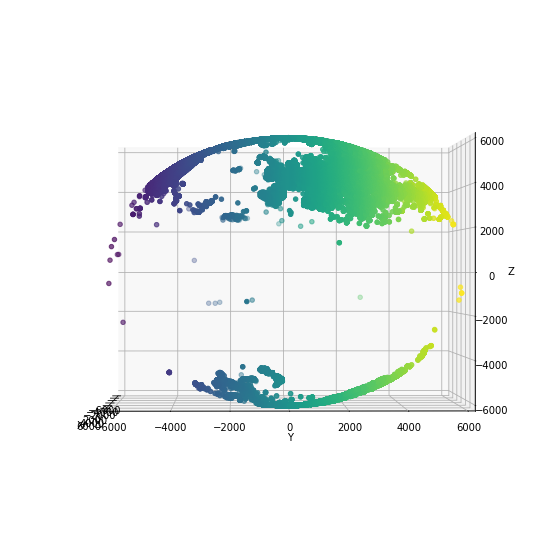

In [73]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(df2['x'], df2['y'], df2['z'], c=df2['y'])
# Set limits of the 3D display
ax.set_xlim3d([-6000, 6000])
ax.set_ylim3d([-6000, 6000])
ax.set_zlim3d([-6000, 6000])

# Set labels at the 3d box/frame
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(0, angle)


In [56]:
df[['lat_rad','long_rad']] = df[['latitude','longitude']].apply(np.deg2rad)

In [57]:
df[['lat_rad','long_rad']].describe()

,lat_rad,long_rad
count,1.138812e+06,1.138812e+06
mean,4.690502e-01,3.613700e-01
std,4.039519e-01,1.443001e+00
min,-1.482269e+00,-3.057123e+00
25%,2.227923e-01,-1.246778e+00
50%,6.231251e-01,5.049589e-01
75%,7.274483e-01,1.784038e+00
max,1.484422e+00,3.114372e+00


In [ ]:
np.deg2rad()

In [ ]:
df[[ 'latitude', 'longitude']].apply(lambda x: coord2xyz(x.latitude, x.longitude), axis=1)

In [ ]:
df[[ 'x', 'y', 'z']] = df[[ 'latitude', 'longitude']].apply(lambda x: coord2xyz(x.latitude, x.longitude), axis=1)

In [ ]:
df

In [ ]:
from sklearn.neighbors import BallTree

In [ ]:
ball = BallTree(df[['lat_rad','long_rad']].values, metric='haversine')


In [ ]:
from tqdm import tqdm

In [ ]:
from joblib import parallel_backend

with parallel_backend('threading', n_jobs=max(cores_available-1,1)):
    bt_distances, bt_indices = tqdm(ball.query(df[['lat_rad','long_rad']].values, k = 10))

In [ ]:
bt_indices, bt_distances

In [ ]:
bt_indices.tolist()

In [ ]:
bt_indices.shape

In [ ]:
def find_poi(row)

In [ ]:
df.loc[1,['point_of_interest']].values[0]

In [ ]:


pd.Series(data=bt_indices.tolist()[0:20]).apply(lambda x: [df.loc[y,['point_of_interest']].values[0] for y in x])

In [ ]:
from scipy import spatial

In [ ]:
train_lat = df['latitude'].values
train_long = df['longitude'].values
train_lat_long = tuple(zip(train_lat, train_long))
tree = spatial.KDTree(train_lat_long)
loc_data = tree.query(train_lat_long,350, workers=cores_available)    
distances, indices = loc_data

In [ ]:
distances

In [ ]:
indices

In [ ]:
values_count = df.point_of_interest.apply(lambda x: len(x))

In [ ]:
df.groupby('point_of_interest').agg({'id':lambda x: ",".join(x)})

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
